In [1]:
import IP
from IP import imread, imresize, randn, dtfuv, fftfilt, np, imshow, rgb2gray, plt, fft2, ifft2, fftshift
import scipy
from scipy.signal import convolve2d
from PIL import Image

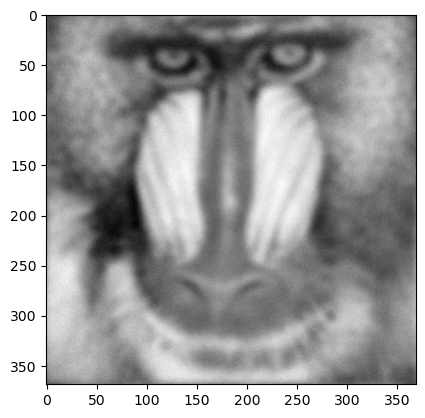

In [2]:
# read broken image with unknown blur and noise
png_I_blur = imread("blurred_noisy_baboon.png")
rgb_I_blur = png_I_blur[:,:,:3]
I_blur = rgb2gray(rgb_I_blur)
plt.figure()
imshow(I_blur, aspect="equal", cmap="gray")

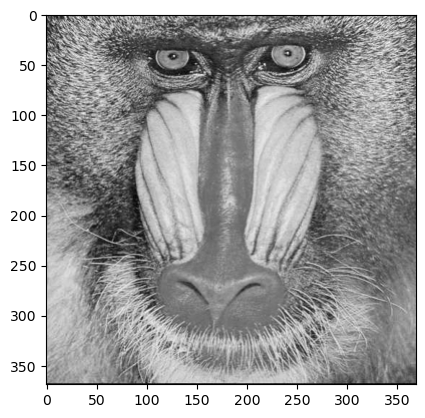

In [69]:
# read ground truth image
I_truth = rgb2gray(imread("baboon.jpg"))
# I_truth = rgb2gray(imread("../tiger.jpg"))
I_truth = imresize(I_truth, I_blur.shape[0], I_blur.shape[1])
plt.figure()
imshow(I_truth, aspect="equal", cmap="gray")

In [70]:
# penalty term function

In [71]:
# psf estimate function
# returns "inverse filter"
def psf_estimate(Ig, Ii, n, noise_signal_ratio=0.001):
    Igf = fft2(Ig, Ii.shape)
    Iif = fft2(Ii, Ii.shape)
    epsilon = 1e-10
    H = Iif / (Igf+epsilon)
#     print(np.sum(np.abs(Igf-Iif)**2))
    plt.imshow(np.log10(1+np.abs(fftshift(H))), aspect="equal", cmap="gray")
    filename = f'./test6/baboon_{1+n}.png'
    plt.savefig(filename)
    return H / H.sum() # normalize

In [72]:
# iterative loop
def EM_loop(Ig, Ii):
    estimated_image = Ii
    for i in range(1):
        psf = psf_estimate(Ig, estimated_image, i, 0.001)
        estimated_image_fft = fft2(estimated_image)
        psf_fft = fft2(psf, estimated_image.shape)
        
        #penalty term
        
        #deconvolution
#         decon_fft = (fft2(Ii) * np.conj(psf_fft)) / (np.abs(psf_fft)**2+estimated_image_fft)
        epsilon = 1e-10
        decon_fft = estimated_image_fft / (psf+epsilon)
        
        estimated_image = np.abs(ifft2(decon_fft))
        print("loop",i," ",np.sum(np.abs(Ig-(estimated_image/estimated_image.max())*Ig.max())**2))
        
    return (estimated_image/estimated_image.max())*Ig.max()

loop 0   7.736548878034803e-08
final error 7.736548878034803e-08


Text(0.5, 1.0, 'Difference')

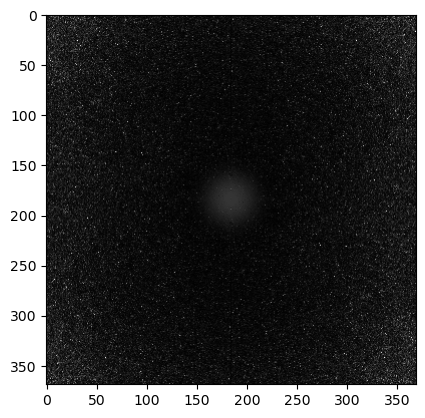

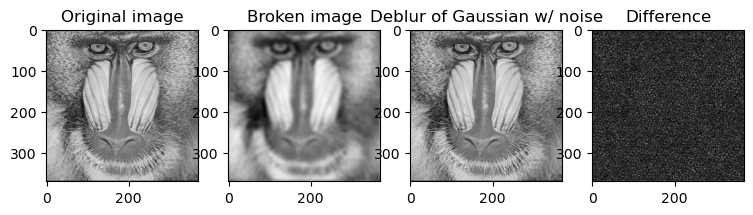

In [73]:
estimate = EM_loop(I_truth, I_blur)
print("final error", np.sum(np.abs(I_truth-estimate)**2))
plt.figure(figsize=(9,3))
IP.subplot(1,4,1);imshow(I_truth, aspect="equal", cmap="gray"); plt.title('Original image')
IP.subplot(1,4,2);imshow(I_blur, aspect="equal", cmap="gray"); plt.title('Broken image')
IP.subplot(1,4,3);imshow(estimate, aspect="equal", cmap="gray"); plt.title('Deblur of Gaussian w/ noise')
IP.subplot(1,4,4);imshow(np.abs(I_truth-estimate), aspect="equal", cmap="gray"); plt.title('Difference')